<a href="https://colab.research.google.com/github/ShubhamDigrase16/EDA_Capstone_Project_Hotel_Booking_Analysis/blob/main/EDA_on_Hotel_Booking_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

###**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

###**Explore and analyze the data to discover important factors that govern the bookings.**

####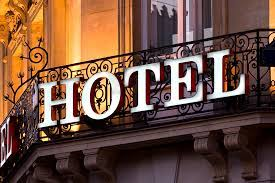

### **Import Libraries**

In [231]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Dataset Loading**

In [232]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/Colab Notebooks/project/Hotel Bookings.csv"
hotel_df= pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Dataset First View**

In [233]:
# Dataset First Look
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [234]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [235]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### **Dataset Rows & Columns count**

In [236]:
# Dataset Rows & Columns count
hotel_df.shape
print(hotel_df.shape)
print(f"total number of rows in given data set is {hotel_df.shape[0]}")
print(f"total number of columns in given data set is {hotel_df.shape[1]}")

(119390, 32)
total number of rows in given data set is 119390
total number of columns in given data set is 32


### **Dataset Information**

In [237]:
# Dataset Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### **Duplicate Values**

In [238]:
# Dataset Duplicate Value Count
len(hotel_df[hotel_df.duplicated()])

31994

In [239]:
# Dropping duplicate values
hotel_df.drop_duplicates(inplace = True)

In [240]:
hotel_df.shape

(87396, 32)

In [241]:
## Creating a copy of dataframe
df_hotel_bookings =hotel_df.copy()

In [242]:
df_hotel_bookings.shape

(87396, 32)

#### **Missing Values/Null Values**

In [243]:
# Missing Values/Null Values Count
df_hotel_bookings.isnull().sum() 

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


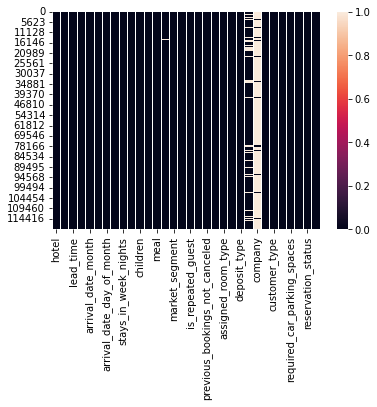

In [244]:
# Visualizing the missing values
sns.heatmap(df_hotel_bookings.isnull() )

### **Dataset Details**

*The Country list has 488 missing values.

*The Agent list has 12193 missing values.

*The Company list has 82137 missing values.

*The company and agent columns have company number and agent numbers as data. There may be some cases when customer didn't booked hotel via any agent or via any company. So in that case values can be null under these columns.

###**Understanding Your Variables**

In [245]:
# Dataset Columns
df_hotel_bookings.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [246]:
# Dataset Describe
df_hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Variables Description**

* Hotel : H1= Resort Hotel H2=City Hotel
* is_cancelled : If the booking was cancelled(1) or not(0)
* lead time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year : Year of arrival date
  arrival_date_monthb : Month of arrival date
  arrival_date_week_number : Week number for arrival date
* arrival dat day : Day of arrival date
* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays in week nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults : Number of adults
* children : Number of children
* babies : Number of babies
* meal : Kind of meal opted for 
* country : Country code
* market segment : Which segment the customer belongs to
* Distribution channel : How the customer accessed the stay- corporate booking/Direct/TA.TO
* is_repeated_guest : Guest coming for first time or not
* previous cancellation : Was there a cancellation before
* previous bookings : Count of previous bookings
* reserved_room_type : Type of room reserved
* assigned room type : Type of room assigned
* booking changes : Count of changes made to booking
* deposit type : Deposit type
* agent :  Booked through agent
* days in waiting list : Number of days in waiting list
* customer_type : Type of customer
* required car parking : If car parking is required
* total_of_special_req : Number of additional special requirements.
* reservation status : Reservation of status
* reservation_status_date : Date of the specific status






### **Lets Explore Our data and Analyse it.**

###**Check Unique Values for each variable.**

In [247]:
# Check Unique Values for each variable.
for i in df_hotel_bookings.columns.tolist():
  print("No. of unique values in ",i,"is",df_hotel_bookings[i].nunique(),".")
     

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

In [248]:
# Handling missing values
df_hotel_bookings.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [249]:
#We will replace null values by 0 in these columns:
df_hotel_bookings[['company','agent']] = df_hotel_bookings[['company','agent']].fillna(0)


In [250]:
df_hotel_bookings['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

The column children has 0 as value which means 0 children were present in group of customers who made that transaction.
We will replace the null values under this column with mean value of children.






In [251]:
# Replacing null values
df_hotel_bookings['children'].fillna(0 , inplace = True)

This column represents the country of origin of customer.








In [252]:
#We will replace the missing value with the mode of 'country' column.
df_hotel_bookings['country'].fillna('others', inplace = True)

In [253]:
# Check all null values are removed.
df_hotel_bookings.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

 
Adults, babies, and children can’t be zero at the same time, so dropping the rows having all these zero at the same time because will mean that the hotel/room was not even booked.

In [254]:
df_hotel_bookings[df_hotel_bookings['adults']+df_hotel_bookings['babies']+df_hotel_bookings['children'] == 0].shape

(166, 32)

In [255]:
df_hotel_bookings.drop(df_hotel_bookings[df_hotel_bookings['adults']+df_hotel_bookings['babies']+df_hotel_bookings['children'] == 0].index, inplace = True)

In [256]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df_hotel_bookings[['children', 'company', 'agent']] = df_hotel_bookings[['children', 'company', 'agent']].astype('int64')

In [257]:
# changing datatype of column 'reservation_status_date' to data_type.
df_hotel_bookings['reservation_status_date'] = pd.to_datetime(df_hotel_bookings['reservation_status_date'], format = '%Y-%m-%d')

###**Types of customers w.r.t the hotels.**

In [258]:
# Grouping types of customers with respect to both the hotels
types_of_customers = df_hotel_bookings.groupby(['hotel','customer_type'])['hotel'].count().unstack()
print(types_of_customers)

customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         1467    269      44522             7016
Resort Hotel       1668    272      27340             4676


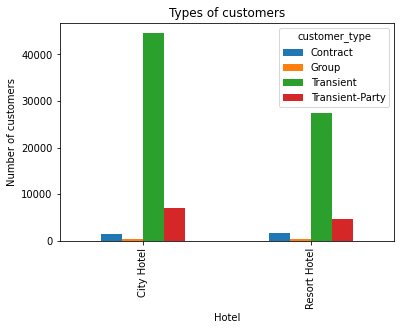

In [259]:
# Creating a Bar Plot for representing the types of customers for both the hotels
types_of_customers.plot(kind='bar')

plt.title('Types of customers')
plt.ylabel('Number of customers')
plt.xlabel('Hotel')

# Fixing the size of the plot
plt.rcParams['figure.figsize'] = (5,5)

From above bar plot chart the 'Transient Type' of customer is highest and the 'Group Type' customers are lower.

###**Repeated and New Customers**

In [260]:
# Finding number of new and repeated customers
total_repeated_guests = hotel_df.groupby(['hotel','is_repeated_guest','customer_type'])['hotel'].count().unstack()
print(total_repeated_guests)

customer_type                   Contract  Group  Transient  Transient-Party
hotel        is_repeated_guest                                             
City Hotel   0                      1457    227      43135             6901
             1                        14     44       1506              144
Resort Hotel 0                      1649    161      25915             4536
             1                        19    112       1430              146


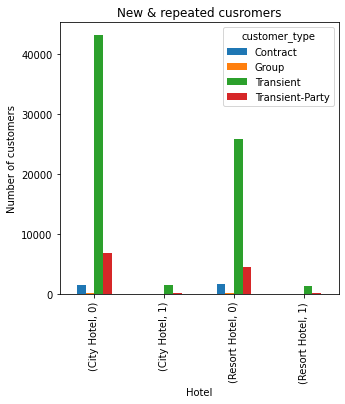

In [261]:
# Creating a Bar Plot for representing the number of new and repeated customers for both the hotels
total_repeated_guests.plot(kind='bar')

plt.title('New & repeated cusromers')
plt.ylabel('Number of customers')
plt.xlabel('Hotel')

# Fixing the size of the plot
plt.rcParams['figure.figsize'] = (5,5)

From above bar plot chart the 'Transient Type' of customers are more repeated and the 'Contract Type' customers has less repeated.

###**Top Countries customers**

In [262]:
# Finding the top countries from where the hotels are attending most guests
top_countries_customers = hotel_df['country'].value_counts().head()
print(top_countries_customers)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
Name: country, dtype: int64


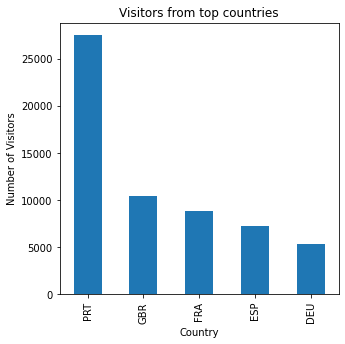

In [263]:
# Creating a bar plot to visualize visitors from countries

top_countries_customers.plot(kind = 'bar')

plt.title('Visitors from top countries')
plt.ylabel('Number of Visitors')
plt.xlabel('Country')

# Fixing the size of the plot

plt.rcParams['figure.figsize'] = (5,5)

From above bar plot chart the most of the visitors are from Portugal(PRT).

###**Change in Bookings**

In [264]:
# Finding out which type of cystomers make change in booking the most
changes_in_bookings = hotel_df.groupby('customer_type')['booking_changes'].sum()
print(changes_in_bookings)

customer_type
Contract             471
Group                165
Transient          16142
Transient-Party     6959
Name: booking_changes, dtype: int64


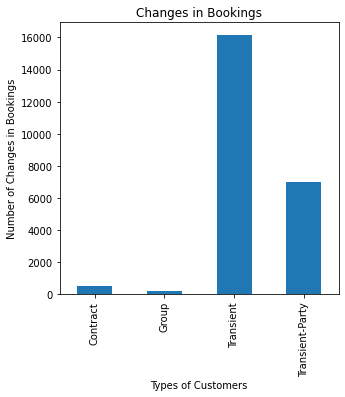

In [265]:
# Creating a bar plot to visualize, which type of customers are making the most changes in bookings
changes_in_bookings.plot(kind='bar')

plt.title('Changes in Bookings')
plt.ylabel('Number of Changes in Bookings')
plt.xlabel('Types of Customers')

# Fixing the size of the plot
plt.rcParams['figure.figsize'] = (5,5)

From Above bar plot chart the 'Transient Type' customer are making more changes in bookings and the 'Group Type' cutsomer are making less changes in bookings.

##**Exploratory Data Analysis(EDA) and Data Visualization**

##**1. What is percentage of bookings in City and Resort hotel?**

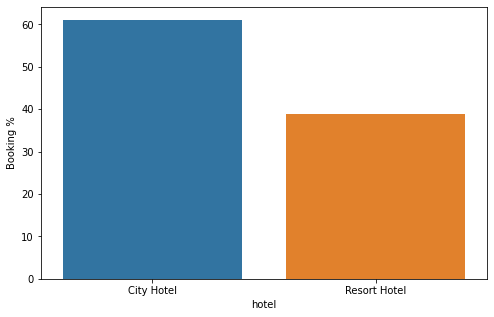

In [266]:
# Chart - 1 visualization code
hotel_bookings_percentage = df_hotel_bookings.groupby('hotel')
d1 = pd.DataFrame((hotel_bookings_percentage.size()/df_hotel_bookings.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

**Findings**

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

##**2. Which hotel has higher lead time?**

          hotel  lead_time
0    City Hotel       51.0
1  Resort Hotel       47.0


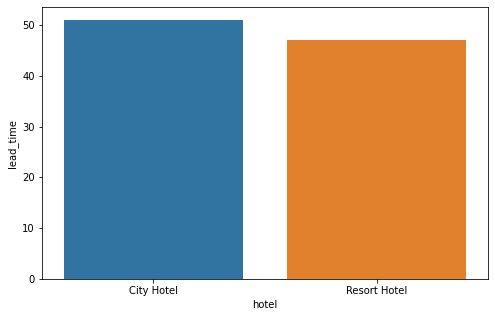

In [267]:
# Chart - 2 visualization code
lead_df = hotel_bookings_percentage['lead_time'].median().reset_index().rename(columns = {'lead_time':'lead_time'})
print(lead_df)
plt.figure(figsize = (8,5))
sns.barplot(x = lead_df['hotel'], y = lead_df['lead_time'] )
plt.show()

**Findings**

City hotel has more lead time as compared to resort hotel.

##**3.What is total number of canceled Bookings by hotel type?**

is_canceled       0      1
hotel                     
City Hotel    37239  16035
Resort Hotel  25982   7974


Text(0, 0.5, 'Bookings and canceled values')

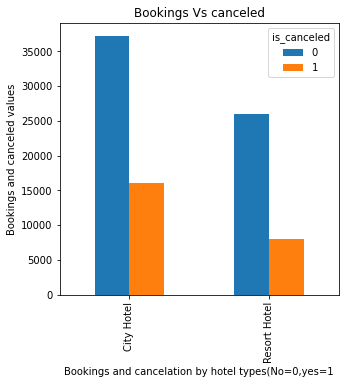

In [268]:
# Chart - 3 visualization code
df_canceled_booking =df_hotel_bookings.groupby(['hotel', 'is_canceled',])['is_canceled'].count().unstack()
print(df_canceled_booking)
# creating the plot object
df_canceled_booking.plot(kind = 'bar')
plt.title('Bookings Vs canceled')
plt.xlabel('Bookings and cancelation by hotel types(No=0,yes=1')
plt.ylabel('Bookings and canceled values')


**Findings**

From above bar plot chart 'City Hotel' has highest bookings and higher cancellation also as compared to resort hotel.

##**4.What is total number of Bookings&Cancellations through market segme**nts?


In [269]:
# Chart - 4 visualization code
df_Segments = df_hotel_bookings.groupby(['hotel', 'is_canceled',"market_segment"])['is_canceled'].count().unstack()
df_Segments



market_segment            Aviation  Complementary  Corporate  Direct  Groups  \
hotel        is_canceled                                                       
City Hotel   0               181.0          449.0     1955.0  4626.0  1732.0   
             1                45.0           54.0      263.0   912.0   887.0   
Resort Hotel 0                 NaN          158.0     1736.0  5417.0  1858.0   
             1                 NaN           31.0      246.0   825.0   445.0   

market_segment            Offline TA/TO  Online TA  Undefined  
hotel        is_canceled                                       
City Hotel   0                   5982.0    22314.0        NaN  
             1                   1257.0    12615.0        2.0  
Resort Hotel 0                   5816.0    10997.0        NaN  
             1                    800.0     5627.0        NaN

Text(0, 0.5, 'Values')

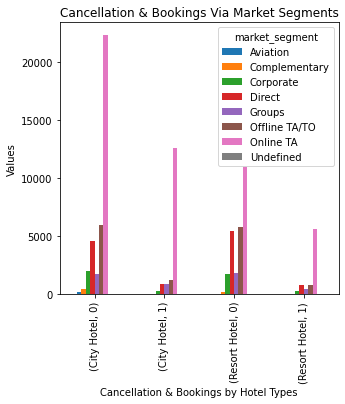

In [270]:
df_Segments.plot(kind = 'bar')
plt.title('Cancellation & Bookings Via Market Segments')
plt.xlabel('Cancellation & Bookings by Hotel Types')
plt.ylabel('Values')
     

**Findings**

From Above bar plot chart we find that the highest segment from where the booking and cancellation done are Online TA .

##**5.Which year had the highest bookings?**


Text(0.5, 1.0, 'Year Wise bookings')

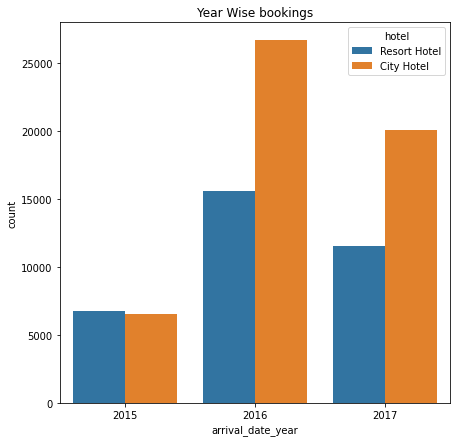

In [271]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))

#  plot with countplot
sns.countplot(x=df_hotel_bookings['arrival_date_year'],hue=df_hotel_bookings['hotel'])
plt.title("Year Wise bookings")

**Findings**

*   2016 had the highest booking.
*   2015 had the lowest booking.
*   Overall City hotels had the most of the bookings.








##**6. Which hotel has longer waiting time?**

In [272]:
df_waiting_time = df_hotel_bookings .groupby('hotel')['days_in_waiting_list'].mean().reset_index()
df_waiting_time 

,hotel,days_in_waiting_list
0,City Hotel,1.020066
1,Resort Hotel,0.316763


Text(0.5, 1.0, 'Waiting Time For Each Hotel Type')

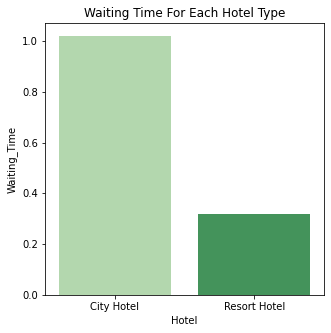

In [273]:
# Chart - 6 visualization code
sns.barplot(x=df_waiting_time['hotel'],y=df_waiting_time['days_in_waiting_list'],palette='Greens')
plt.xlabel('Hotel')
plt.ylabel('Waiting_Time')
plt.title('Waiting Time For Each Hotel Type')

**Findings**

We observed that the City Hotels has longer waiting period than the Resort Hotels.Therefore that City Hotels are much busier than the Resort Hotels

##**7.What is the cancellation percentage of bookings?**

Text(0.5, 1.0, 'Cancellation(1) & Non_Cancellation(0) Of Bookings')

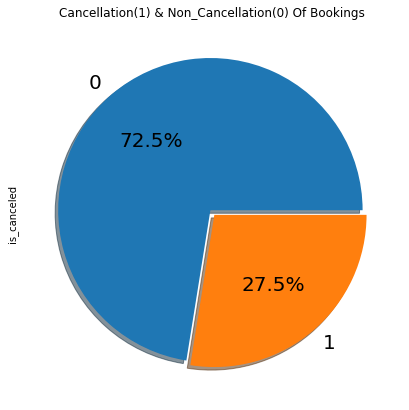

In [274]:
# Chart - 7 visualization code
canceled_bookings = df_hotel_bookings['is_canceled'].value_counts().plot.pie(
    explode=[0.02,0.02],
    autopct="%1.1f%%",
    shadow=True,
    figsize=(7,7),fontsize=20)
plt.title("Cancellation(1) & Non_Cancellation(0) Of Bookings")

**Findings**

27.5% of the bookings were cancelled.

##**8. What is the Percentage of repeated guests?**

Text(0.5, 1.0, 'Percentage Of Repeated Guests')

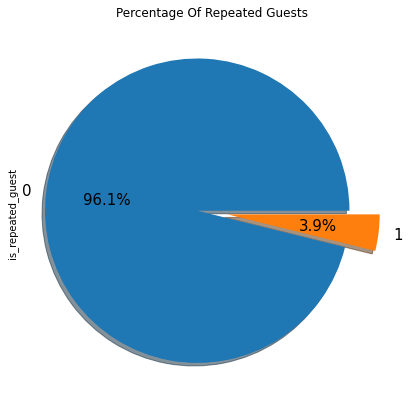

In [275]:
# Chart - 8 visualization code
percentage_repeated_guests = df_hotel_bookings['is_repeated_guest'].value_counts().plot.pie(
    explode=[0.1,0.1],
    autopct='%1.1f%%',
    shadow=True,
    figsize=(7,7),fontsize=15)
plt.title("Percentage Of Repeated Guests")

**Findings**

Repeated guests are only 3.9%, so to retain the guests, it is important to take feedback from them, with the help of these feedbacks hotel management should make some improvements according to the guest needs and provide services to reach the guests.

##**9.What is The Percentage Distribution of Deposit type ?**

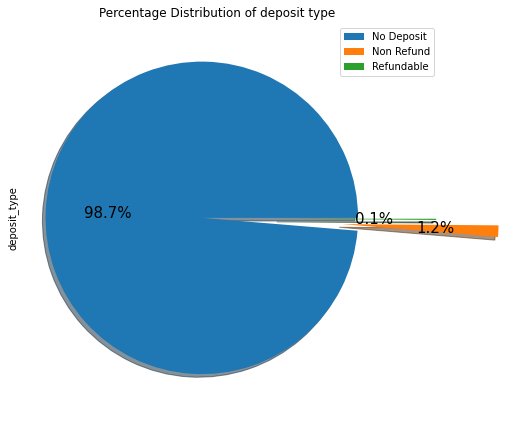

In [276]:
# Chart - 9 visualization code
percentage_deposit_type = df_hotel_bookings['deposit_type'].value_counts().plot.pie(explode=(0.1,0.8,0.4),autopct='%1.1f%%',shadow=True,figsize=(7,8),fontsize=15,labels=None)
plt.title("Percentage Distribution of deposit type")
labels=df_hotel_bookings['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', labels=labels)

**Findings**

From above bar plot we find that 98.7 % of guests prefer "No Deposit" type of deposit.



##**10. Which type of food is mostly preferred by the guests?**

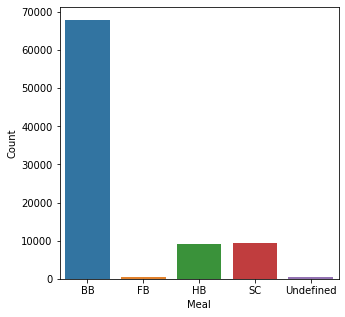

In [277]:
# Chart - 10 visualization code
sns.countplot(x=df_hotel_bookings['meal']).set(xlabel='Meal',ylabel='Count');

**Findings**

From above chart we found that:
* So the most preferred meal type by the guests is BB( Bed and Breakfast).
* HB- (Half Board) and SC- (Self Catering) are equally preferred.





##**11.Which is the most preferred room type by the customers?**

Text(0.5, 1.0, 'Most Preferred Room Type')

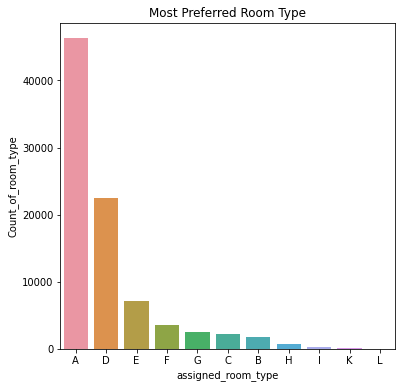

In [278]:
# Chart - 11 visualization code
plt.figure(figsize=(6,6))
sns.countplot(x=df_hotel_bookings['assigned_room_type'],order=df_hotel_bookings['assigned_room_type'].value_counts().index)
plt.xlabel('assigned_room_type')
plt.ylabel('Count_of_room_type')
plt.title("Most Preferred Room Type")

**Findings**

From above chart we observed that mostly guests prefer to stay in the room type"A".

##**12.In which month most of the bookings happened?**

In [279]:
# Chart - 12 visualization code
df_arrival_date_month=df_hotel_bookings.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
df_arrival_date_month

,arrival_date_month,Counts
0,April,7900
1,August,11242
2,December,5112
3,February,6083
4,January,4685
5,July,10043
6,June,7756
7,March,7489
8,May,8344
9,November,4973


In [280]:
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# create DataFrame
df_arrival_date_month['arrival_date_month']=pd.Categorical(df_arrival_date_month['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
df_arrival_date_month=df_arrival_date_month.sort_values('arrival_date_month')


Text(0.5, 1.0, 'Total Number Of Bookings In Each Month')

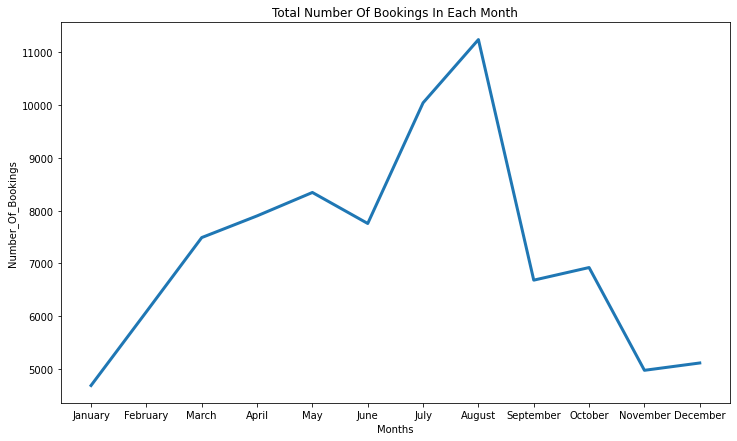

In [281]:
plt.figure(figsize=(12,7))
sns.lineplot(x=df_arrival_date_month['arrival_date_month'],y=df_arrival_date_month['Counts'],linewidth=3,palette='Blues')
plt.xlabel('Months')
plt.ylabel('Number_Of_Bookings')
plt.title('Total Number Of Bookings In Each Month')

**Findings**

July and August months had the most Bookings.After august line is deeping and bookings are low in september and octomber so on.Summer vaccation can be the reason for bookings.

##**13. Which Distribution channel is mostly used for hotel bookings?**

In [282]:
# Chart - 13 visualization code
df_distribution_channel= df_hotel_bookings['distribution_channel'].value_counts().reset_index().rename(
    columns={'index':'channel', 'distribution_channel':'count'}
)
labels = df_hotel_bookings['distribution_channel'].value_counts().index.tolist()
df_distribution_channel['percentage'] = round(df_distribution_channel['count']*100/df_hotel_bookings.shape[0], 1)
sizes = df_distribution_channel['percentage'].tolist()


Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

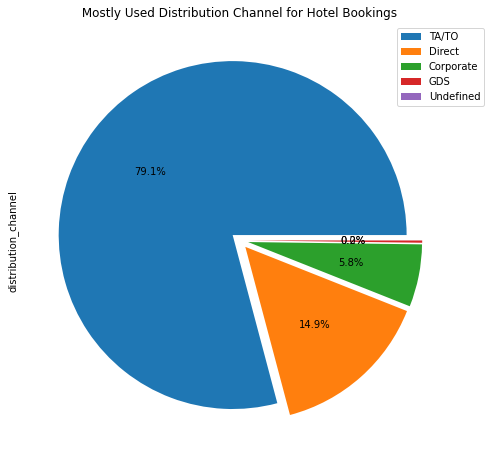

In [283]:
plt.figure(figsize=(14, 8))
df_hotel_bookings['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], 
                                                    shadow=False, autopct='%1.1f%%', 
                                                    figsize=(15,8),
                                                    fontsize=10,
                                                    labels=None)  
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

**Findings**

We observed that the'TA/TO' is mostly(79.1%) used for booking hotels.

##**14. Which distribution channel has the highest cancellation rate?**

In [284]:
# Chart - 14 visualization code
df_distribution_canceled = df_hotel_bookings[df_hotel_bookings['is_canceled'] == 1]
df_distribution_canceled  = df_distribution_canceled .groupby(['distribution_channel', 'hotel']).size().reset_index().rename(columns={0:'count'})

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

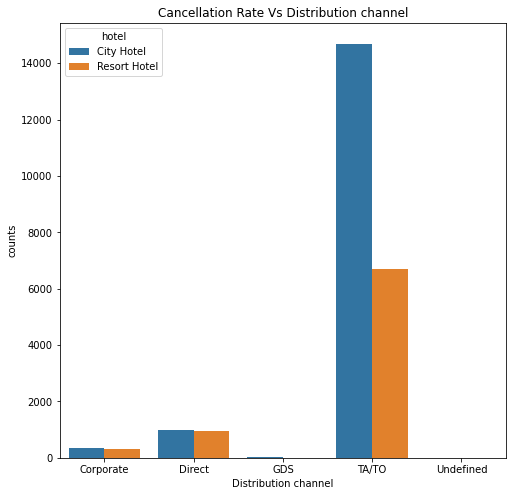

In [285]:
plt.figure(figsize=(8, 8))
sns.barplot(x='distribution_channel',y='count',hue="hotel",data=df_distribution_canceled)

plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

**Findings**

From above bar plot chart we observed that in "TA/TO" City hotels has the high cancellation rate compared to resort hotels and in "Direct" both the hotels has almost same cancellation rate.

##**15.Which Hotel type has the highest ADR(Average Daily Rate)?**

In [286]:
df_highest_adr = df_hotel_bookings.groupby('hotel')['adr'].mean().reset_index()
df_highest_adr

,hotel,adr
0,City Hotel,111.271969
1,Resort Hotel,99.059517


Text(0.5, 1.0, 'Highest ADR Of Each Hotel type')

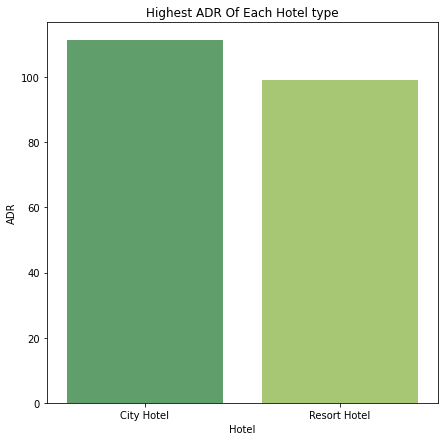

In [287]:
# Chart - 15 visualization code
plt.figure(figsize=(7,7))

#plot the graph
sns.barplot(x=df_highest_adr['hotel'],y=df_highest_adr['adr'],palette='summer')

# set labels
plt.xlabel('Hotel')
plt.ylabel('ADR')
plt.title("Highest ADR Of Each Hotel type")

**Findings**

We observed that the Adr is directly proportional to revenue, so if adr increases, revenue will automatically increase.and City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels.

##**16.ADR across different market segment.**

In [288]:
adr_market_df = df_hotel_bookings.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()
adr_market_df

,market_segment,hotel,is_canceled,adr
0,Aviation,City Hotel,0,100.630829
1,Aviation,City Hotel,1,100.544444
2,Complementary,City Hotel,0,2.875501
3,Complementary,City Hotel,1,2.191296
4,Complementary,Resort Hotel,0,4.390127
5,Complementary,Resort Hotel,1,1.209677
6,Corporate,City Hotel,0,82.079575
7,Corporate,City Hotel,1,90.012586
8,Corporate,Resort Hotel,0,49.569977
9,Corporate,Resort Hotel,1,68.510935


Text(0.5, 1.0, 'Adr across market segment')

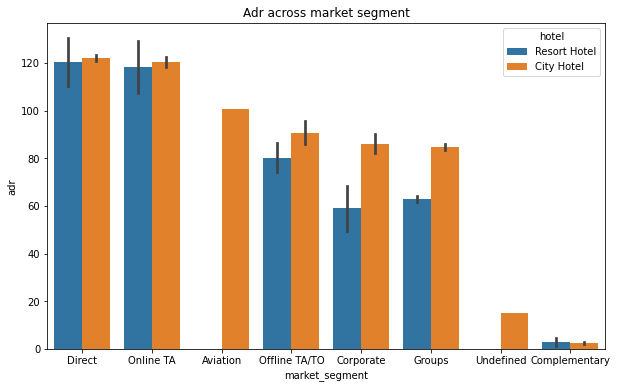

In [289]:
# Chart - 16 visualization code
plt.figure(figsize=(10,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=adr_market_df.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

**Findings**

From above bar plot chart we found that 'Direct' and 'Online TA' contribute the most in both types of hotels.The aviation department should focus on increasing 'city hotel' bookings.

##**17.Finding total of Special requests with respect to customer.**

In [290]:
df_special_requests = df_hotel_bookings.groupby(['hotel', 'customer_type','total_of_special_requests'])['customer_type'].count().unstack()
df_special_requests

total_of_special_requests           0        1       2       3      4     5
hotel        customer_type                                                 
City Hotel   Contract           297.0    597.0   492.0    77.0    3.0   1.0
             Group              144.0     79.0    36.0     8.0    2.0   NaN
             Transient        21122.0  15577.0  6333.0  1306.0  167.0  17.0
             Transient-Party   4703.0   1761.0   459.0    78.0   11.0   4.0
Resort Hotel Contract          1082.0    413.0   138.0    31.0    3.0   1.0
             Group              153.0     81.0    30.0     6.0    1.0   1.0
             Transient        13252.0   9412.0  3860.0   692.0  114.0  10.0
             Transient-Party   3036.0   1056.0   447.0   116.0   19.0   2.0

Text(0.5, 0, 'customer_type')

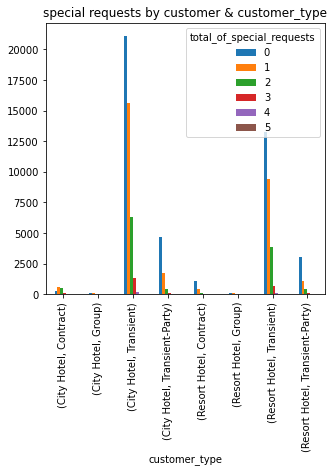

In [291]:
# Chart - 17 visualization code
df_special_requests.plot(kind = 'bar')
plt.title('special requests by customer & customer_type')
plt.xlabel('customer_type')


**Findings**

From above bar plot chart we observed that in 'City Hotel' with 'Transient type' of customer has highest no of special requests.

##**18.How long do people stay at the hotels?**

In [292]:
df_hotel_bookings['total_nights'] = df_hotel_bookings['stays_in_weekend_nights'] + df_hotel_bookings['stays_in_week_nights']
df_hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [293]:
df_stay = df_hotel_bookings.groupby(['total_nights', 'hotel']).agg('count').reset_index()
df_stay = df_stay.iloc[:, :3]
df_stay = df_stay.rename(columns={'is_canceled':'Number of stays'})
df_stay

,total_nights,hotel,Number of stays
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


Text(0.5, 0, 'total_stay(days)')

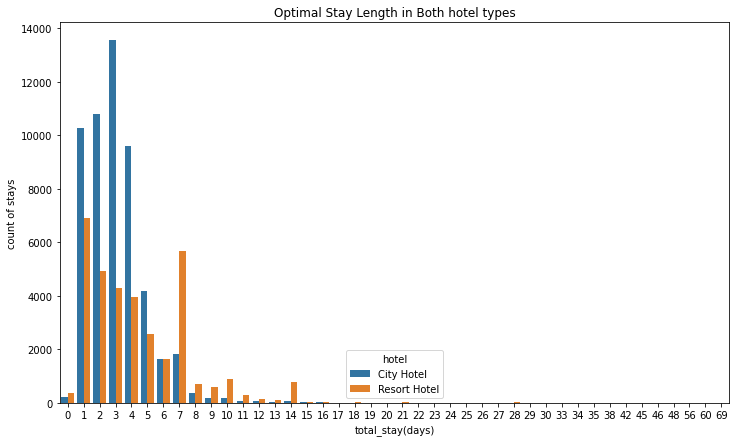

In [294]:
# Chart - 18 visualization code
plt.figure(figsize = (12,7))
sns.barplot(x = 'total_nights', y = 'Number of stays', hue='hotel',data= df_stay)
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

**Findings**

We observed that the optimal stay in both types of hotels is less than 7 days.


##**19. Requirement of parking spaces.**

Text(0.5, 1.0, 'Car Parking Spaces Demand')

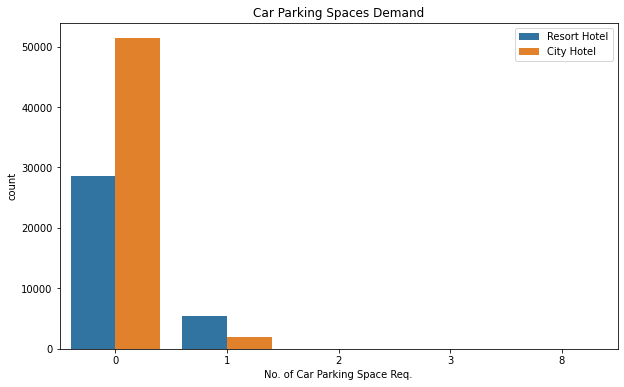

In [295]:
# Chart - 19 visualization code
plt.figure(figsize = (10,6))
sns.countplot(x='required_car_parking_spaces', hue='hotel', data=df_hotel_bookings)
plt.xlabel("No. of Car Parking Space Req.")
plt.legend(loc=1)
plt.title("Car Parking Spaces Demand")

**Findings**

We observed that the 'City Hotel' and 'Resort Hotel' maximum guests required zero space.Very less guests in both type of hotel required one space for car parking.

##**Correlation Of Heatmap**


Text(0.5, 1.0, 'Co-relation of columns')

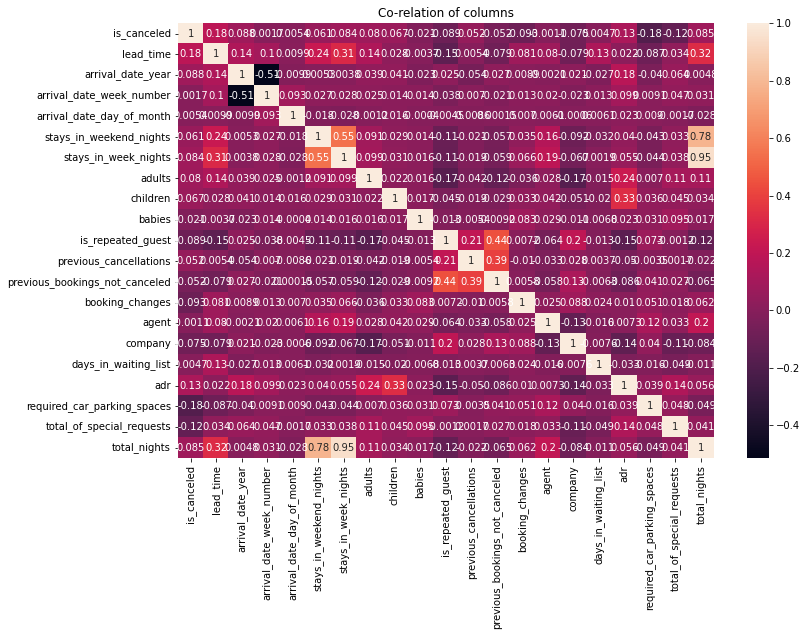

In [296]:
# Chart - 20 visualization code
plt.figure(figsize=(12, 8))
sns.heatmap(df_hotel_bookings  .corr(), annot=True)
plt.title('Co-relation of columns')

**Findings**

We observed that:


*   'is_canceled' and 'total_nights' are corelated to each other.If the customer does stay on nights in hotels, therwe is no cancelation of bookings.

*   'lead_time' and 'total_of_special_requests' are also corelated to each other.As more we provide more special requests the the period of time taken by customer is more that is lead time.



*   'adr' and 'is_repeated guests' are also corelated to each other.More numberof repeated guests the more are average daily rate. 








## **Solution to Business Objective**




*   Create a Loyalty Program:Loyalty programs are one of the best ways to increase repeat guests. Offering loyalty points and rewards, such as discounts and free upgrades, will encourage customers to return to your hotel.
*   Provide Excellent Customer Service: Providing excellent customer service is essential to creating loyal customers. Make sure your staff is friendly, helpful, and attentive to customer needs.

*  Ask for Feedback:Ask customers for feedback on their stay and address any issues they may have. This will show customers that you value their opinion and are willing to make changes based on their feedback.
*  Promote the unique benefits of resort hotels:Resort hotels often have amenities and features that city hotels don't, like outdoor activities, spas, and on-site restaurants. Promote these unique benefits to potential guests to highlight the advantages of staying at a resort hotel.
*   Utilize Social Media:Utilizing social media is a great way to get more bookings in hotels during the monsoon, winter, autumn seasons. You can create engaging posts and even run special promotions and contests to draw attention to your hotel.







# **Conclusion**

1.  City hotels are 60% bookings that is most preferred hotel type by the guests
2.  City hotel has more lead time as compared to resort hotel.
3.   'Online TA' has most no bookings and cancellations in market segment.
4.   'City Hotel' has highest no of cancellations as compared to resort hotel.
5.   Most no of bookings are in year 2016 and lowest bookings are in year 2015. 
6.    City Hotels has longer waiting period than the Resort Hotels.Therefore that City Hotels are much busier than the Resort Hotels.
7.  27.5% of the bookings were cancelled.
8.   Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
9.   98.7 % of guests prefer "No Deposit" type of deposit.
10.   BB( Bed & Breakfast) is the most preferred type of meal by the guests.
11.  Most guests prefer to stay in the room type"A".
12.   July and August months had the most no Bookings in hotel.
13.  79.1 % bookings were made through TA/TO (travel agents/Tour operators).
14.   "TA/TO" City hotels has the high cancellation rate compared to resort hotels and in "Direct" both the hotels has almost same cancellation rate.
15.   ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels. 
16.  Maximum number of guests were from Portugal country.
17.  'Direct' and 'Online TA' contribute the most in both types of hotels.
18.   'City Hotel' with 'Transient type' of customer has highest no of special requests.
19.  The optimal stay in both types of hotels is less than 7 days.
20.   The 'City Hotel' and 'Resort Hotel' maximum guests required zero space.Very less guests in both type of hotel required one space for car parking.
















